- Okt 간단 예제 #1

In [1]:
from konlpy.tag import Okt
okt = Okt()	# Open Korean Text (과거 트위터 형태소 분석기)
text = "마음에 꽂힌 칼한자루 보다 마음에 꽂힌 꽃한송이가 더 아파서 잠이 오지 않는다"
# pos(text): 문장의 각 품사를 태깅
# norm=True: 문장을 정규화,	stem=True:	어간을 추출
okt_tags = okt.pos(text, norm=True,	stem=True)
print(okt_tags)
# nouns(text): 명사만 리턴
okt_nouns =	okt.nouns(text)
print(okt_nouns)

[('마음', 'Noun'), ('에', 'Josa'), ('꽂히다', 'Verb'), ('칼', 'Noun'), ('한', 'Determiner'), ('자루', 'Noun'), ('보다', 'Verb'), ('마음', 'Noun'), ('에', 'Josa'), ('꽂히다', 'Verb'), ('꽃', 'Noun'), ('한송이', 'Noun'), ('가', 'Josa'), ('더', 'Noun'), ('아프다', 'Adjective'), ('잠', 'Noun'), ('이', 'Josa'), ('오지', 'Noun'), ('않다', 'Verb')]
['마음', '칼', '자루', '마음', '꽃', '한송이', '더', '잠', '오지']


- Okt 예제 #2

In [2]:
from konlpy.tag import Okt
text = '나랏말이 중국과 달라 한자와 서로 통하지 아니하므로,\
우매한 백성들이 말하고 싶은 것이 있어도 마침내 제 뜻을 잘 표현하지 못하는 사람이 많다.\
내 이를 딱하게 여기어 새로 스물여덟 자를 만들었으니,\
사람들로 하여금 쉬 익히어 날마다 쓰는 데 편하게 할 뿐이다.'
okt = Okt()
# morphs(text) : 텍스트를 형태소 단위로 나눔
okt_morphs = okt.morphs(text)
print('morphs():\n', okt_morphs)
# 명사만 추출
okt_nouns =	okt.nouns(text)
print('nouns():\n',	okt_nouns)
# phrases(text) : 어절 추출
okt_phrases = okt.phrases(text)
print('phrases():\n', okt_phrases)
# pos(text) : 품사를 태깅
okt_pos = okt.pos(text)
print('pos():\n', okt_pos)

morphs():
 ['나랏말', '이', '중국', '과', '달라', '한자', '와', '서로', '통', '하지', '아니하므로', ',', '우매', '한', '백성', '들', '이', '말', '하고', '싶은', '것', '이', '있어도', '마침내', '제', '뜻', '을', '잘', '표현', '하지', '못', '하는', '사람', '이', '많다', '.', '내', '이를', '딱하게', '여기어', '새로', '스물', '여덟', '자를', '만들었으니', ',', '사람', '들', '로', '하여금', '쉬', '익히어', '날', '마다', '쓰는', '데', '편하게', '할', '뿐', '이다', '.']
nouns():
 ['나랏말', '중국', '달라', '한자', '서로', '통', '우매', '백성', '말', '것', '마침내', '제', '뜻', '표현', '사람', '내', '스물', '여덟', '사람', '쉬', '날', '데', '뿐']
phrases():
 ['나랏말', '중국', '중국과 달라', '중국과 달라 한자', '중국과 달라 한자와 서로', '중국과 달라 한자와 서로 통', '우매', '백성들', '마침내', '마침내 제', '마침내 제 뜻', '표현', '못하는 사람', '스물여덟', '사람들', '달라', '한자', '서로', '사람', '스물', '여덟']
pos():
 [('나랏말', 'Noun'), ('이', 'Josa'), ('중국', 'Noun'), ('과', 'Josa'), ('달라', 'Noun'), ('한자', 'Noun'), ('와', 'Josa'), ('서로', 'Noun'), ('통', 'Noun'), ('하지', 'Verb'), ('아니하므로', 'Adjective'), (',', 'Punctuation'), ('우매', 'Noun'), ('한', 'Josa'), ('백성', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('말', 'Noun'

- 예제 : 단어 분석 및 Word Cloud 생성 #1

In [9]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

text = open('../DATA/test.txt', encoding = 'utf-8').read()
okt = Okt()

# okt 함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text)

noun_adj_list = []
# tag가 명사이거나 형용상 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun', 'Adjective']:
        noun_adj_list.append(word)

print(noun_adj_list)

# 가장 많이 나온 단어부터 50개를 저장한다.
counts = Counter(noun_adj_list)  # Count(리스트) - 리스트 항목의 개수를 딕셔너리 형태로 리턴
tags = counts.most_common(50)  # most_common(n) - 가장 많은 수를 가지는 항목 n개 반환
print(tags)

['우리나라', '경우', '보통', '여', '년', '단위', '구분', '대표', '세대', '중반', '산업화', '세대', '중반', '초반', '베이비부머', '세대', '세대', '세대', '중후', '반', '세대', '일명', '밀레니엄', '세대', '그', '이후', '세대', '있다', '이중', '우리나라', '청년', '세대', '세대', '수', '있다', '같은', '듯', '다른', '세대', '이', '무엇', '세대', '시대', '반영', '세대', '임', '먼저', '세대', '사이', '세대', '용어', '이', '용어', '캐나다', '작가', '더글라스', '커플', '랜드', '소설', '세대', '유래', '당시', '주목', '이', '소설', '기성세대', '다르지만', '정의', '힘든', '젊은', '세대', '칭', '마케팅', '기업', '선택', '말', '마땅하게', '정의', '용어', '없다', '뜻', '사용', '적절했기', '때문', '삐삐', '통한', '연락', '카세트', '테이프', '일종', '워크맨', '이', '세대', '경제', '풍요', '동시', '를', '세대', '체적', '시사', '경제', '쪽', '관심', '많은', '것', '특징', '당시', '경제', '풍요', '가운데', '새로운', '문화', '개인주의', '남', '차별', '화하는', '개성', '중시', '세대', '문화', '대표', '예', '거기', '컬러', '대중화', '대중문화', '성장하기', '시작', '당시', '선풍', '인기', '서태지', '아이', '은', '개성', '넘치는', '이미지', '세대', '열렬한', '지지', '이외', '홍콩영화', '다문화', '시대', '세대', '주름', '가장', '진보', '세대', '명칭', '현재', '세대', '기성세대', '역사상', '가장', '젊은', '타이틀', '토대', '세대', '특징', '간직', '소비', '

In [14]:
dict(tags)

{'세대': 89,
 '소비': 17,
 '등': 16,
 '이': 14,
 '유튜브': 14,
 '것': 13,
 '명': 12,
 '있다': 11,
 '수': 11,
 '를': 10,
 '선호': 10,
 '더': 9,
 '자신': 9,
 '영향': 9,
 '크리에이터': 9,
 '트렌드': 8,
 '점': 8,
 '있는': 8,
 '중': 8,
 '다른': 7,
 '특징': 7,
 '문화': 7,
 '가장': 7,
 '취미': 7,
 '콘셉트': 7,
 '중시': 6,
 '현재': 6,
 '달리': 6,
 '통해': 6,
 '브랜드': 6,
 '대표': 5,
 '같은': 5,
 '젊은': 5,
 '온라인': 5,
 '대비': 5,
 '만족': 5,
 '편이': 5,
 '제품': 5,
 '플렉스': 5,
 '경우': 4,
 '일명': 4,
 '시대': 4,
 '용어': 4,
 '말': 4,
 '없다': 4,
 '사용': 4,
 '관심': 4,
 '비': 4,
 '의미': 4,
 '모습': 4}

- 예제 : 단어 분석 및 Word Cloud 생성 #2

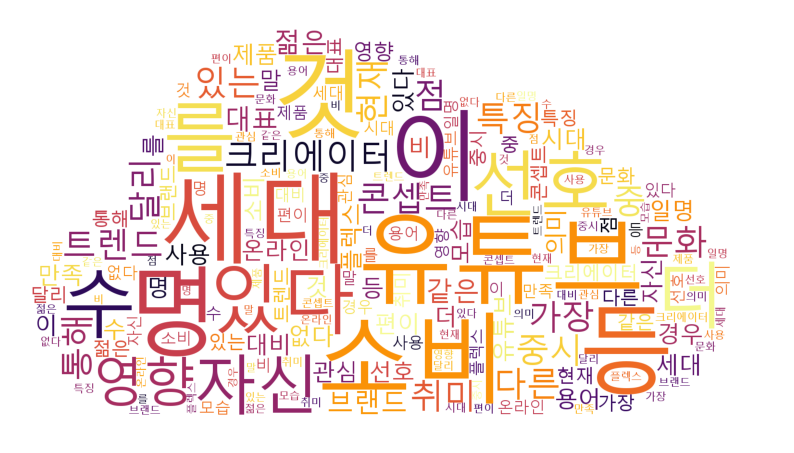

In [10]:
# 한글을 분석하기위해 font를 한글로 지정
path = r'c:\Windows\Fonts\malgun.ttf'

img_mask = np.array(Image.open('../DATA/cloud.png'))
wc = WordCloud(font_path = path, width = 400, height = 400,
               background_color = 'white', max_font_size = 200,
               repeat = True,
               colormap = 'inferno', mask = img_mask)

cloud = wc.generate_from_frequencies(dict(tags))
# 생성된 WordClound를 test.jpg로 보낸다.
# cloud.to_file('test.jpg')
plt.figure(figsize = (10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

- 영문 wordcloud 예제

STOPWORDS :  {'there', 'once', "won't", 'out', 'what', 'doing', "i'll", "didn't", 'is', 'like', 'just', 'nor', 'shall', 'of', 'while', 'here', 'which', 'on', 'do', "wouldn't", "why's", 'k', "aren't", 'down', 'as', 'up', 'we', "let's", 'him', 'whom', "i'd", 'should', 'theirs', 'having', 'same', 'own', 'or', "can't", 'said', "how's", 'her', 'it', "they'd", 'through', 'he', 'were', 'are', 'his', 'during', 'over', 'does', "we'll", 'under', 'with', 'between', 'these', "they'll", 'your', 'no', 'before', "who's", 'herself', 'to', "i'm", 'any', 'then', 'ought', 'and', "mustn't", 'after', "hadn't", 'at', 'cannot', "i've", 'could', 'since', 'i', "shan't", 'www', 'too', 'ever', 'further', "we'd", 'each', 'from', 'into', 'get', 'however', 'such', 'am', 'above', "she'll", "you've", 'again', "shouldn't", "when's", 'about', 'http', 'them', 'you', 'itself', "isn't", 'com', 'but', 'was', 'why', 'all', 'their', 'myself', 'for', 'else', 'yourselves', 'its', "that's", 'yourself', "he'd", 'some', 'how', "s

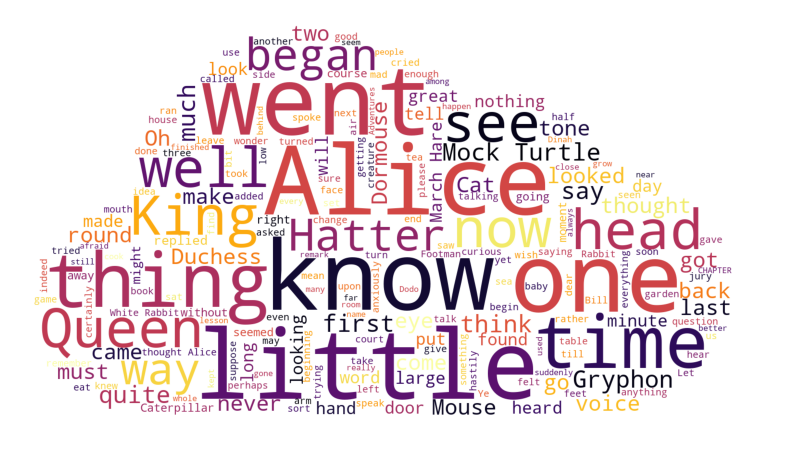

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

text = open('../DATA/alice.txt').read()
STOPWORDS.add('said')
print('STOPWORDS : ', STOPWORDS)

img_mask = np.array(Image.open('../DATA/cloud.png'))

wordcloud = WordCloud(width = 400, height = 400, background_color = 'white', max_font_size = 200,
                      stopwords = STOPWORDS,
                      repeat = True,
                      colormap = 'inferno', mask = img_mask).generate(text)

# words_ : 객체의 비율 정보가 담긴 딕셔너리 반환
print(wordcloud.words_)

plt.figure(figsize = (10, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()